# Assignment: More Xarray with El Niño-Southern Oscillation (ENSO) Data

Here will will calculate the NINO 3.4 index of El Nino variabillity and use it to analyze datasets.

First read [this page from NOAA](https://www.ncdc.noaa.gov/teleconnections/enso/indicators/sst). It tells you the following:

- The Niño 3.4 region is defined as the region between +/- 5 deg. lat, 170 W - 120 W lon.
- Warm or cold phases of the Oceanic Niño Index are defined by a five consecutive 3-month running mean of sea surface temperature (SST) anomalies in the Niño 3.4 region that is above the threshold of +0.5°C (warm), or below the threshold of -0.5°C (cold). This is known as the Oceanic Niño Index (ONI).

(Note that "anomaly" means that the seasonal cycle, also called the "climatology" has been removed.)

Start by importing Numpy, Matplotlib, and Xarray. Set the default figure size to (12, 6).

In [178]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (10, 5)

### 1. Reproduce the SST curve from the figure below

Use the `sst.mnmean.nc` file that we worked with in class, located at <http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc>.

You don't have to match the stylistic details, or use different colors above and below zero, just the "3mth running mean" curve.

![enso](https://www.ncdc.noaa.gov/monitoring-content/teleconnections/eln-f-pg.gif)

Load the data as an Xarray dataset. Drop the `time_bnds` variable as we did in class and trim the data to 1950 onward for this assignment.

In [179]:
url = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc'
ds = xr.open_dataset(url, drop_variables=['time_bnds'])
ds = ds.sel(time=slice('1950', None)).load()

In [180]:
ds

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 881)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2023-05-01
Data variables:
    sst      (time, lat, lon) float32 -1.8 -1.8 -1.8 -1.8 ... nan nan nan nan
Attributes: (12/39)
    climatology:                     Climatology is based on 1971-2000 SST, X...
    description:                     In situ data: ICOADS2.5 before 2007 and ...
    keywords_vocabulary:             NASA Global Change Master Directory (GCM...
    keywords:                        Earth Science > Oceans > Ocean Temperatu...
    instrument:                      Conventional thermometers
    source_comment:                  SSTs were observed by conventional therm...
    ...                              ...
    comment:                         SSTs were observed by conventional therm...
    summary:                         ERSST.v5 is developed based on v4 after ...
    dataset_title:                   NOAA Extended Reconstructed SST V5
    _NCProperties:                   version=2,netcdf=4.6.3,hdf5=1.10.5
    data_modified:                   2023-06-03
    DODS_EXTRA.Unlimited_Dimension:  time

Now calculate the climatology and the SST anomaly.

In [181]:
sst_clim = ds.sst.groupby('time.month').mean(dim='time')
sst_anom = ds.sst.groupby('time.month') - sst_clim

In [182]:
sst_clim

<xarray.DataArray 'sst' (month: 12, lat: 89, lon: 180)>
array([[[-1.8      , -1.8      , -1.8      , ..., -1.8      ,
         -1.8      , -1.8      ],
        [-1.8      , -1.8      , -1.8      , ..., -1.8      ,
         -1.8      , -1.8      ],
        [-1.8      , -1.8      , -1.8      , ..., -1.8      ,
         -1.8      , -1.8      ],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[-1.8      , -1.8      , -1.8      , ..., -1.8      ,
         -1.8      , -1.8      ],
        [-1.8      , -1.8      , -1.8      , ..., -1.8      ,
         -1.8      , -1.8      ],
        [-1.8      , -1.8      , -1.8      , ..., -1.8      ,
         -1.8      , -1.8      ],
...
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[-1.799598 , -1.7996726, -1.7998732, ..., -1.799831 ,
         -1.7997184, -1.7995996],
        [-1.7996516, -1.7998041, -1.8      , ..., -1.8      ,
         -1.7998557, -1.7996799],
        [-1.8      , -1.8      , -1.8      , ..., -1.8      ,
         -1.8      , -1.8      ],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]
    _ChunkSizes:   [  1  89 180]

In [183]:
sst_anom

<xarray.DataArray 'sst' (time: 881, lat: 89, lon: 180)>
array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2023-05-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 7 8 9 10 11 12 1 2 3 4 5

Now reproduce the plot. Keep the rolling 3-month average of the SST anomaly as a DataArray for the next question.

In [188]:
sst_anom_nino34 = sst_anom.sel(lat=slice(5, -5), lon=slice(360-170, 360-120))
sst_anom_nino34_mean = sst_anom_nino34.mean(dim=('lon', 'lat'))
oni = sst_anom_nino34_mean.rolling(time=3, center=True).mean('time')
oni

<xarray.DataArray 'sst' (time: 881)>
array([            nan, -1.54931486e+00, -1.36401403e+00, -1.34644592e+00,
       -1.27353263e+00, -1.10563898e+00, -8.64057899e-01, -7.89814472e-01,
       -8.02415967e-01, -8.87840211e-01, -1.00067329e+00, -1.10952592e+00,
       -1.06448174e+00, -7.54609466e-01, -3.66324037e-01,  1.02690067e-02,
        1.58857688e-01,  3.29028726e-01,  3.71196836e-01,  5.21573782e-01,
        5.76179624e-01,  7.08476007e-01,  6.40699983e-01,  5.00890672e-01,
        2.92318076e-01,  1.52701139e-01,  1.39836013e-01,  1.28943443e-01,
        3.46871233e-03, -2.54071981e-01, -4.06321138e-01, -3.62547994e-01,
       -2.66507238e-01, -3.39997262e-01, -3.55284274e-01, -1.59752533e-01,
        1.59813210e-01,  3.84959638e-01,  4.25305784e-01,  4.92720664e-01,
        5.50863385e-01,  5.18703818e-01,  4.16871041e-01,  3.63862276e-01,
        3.64931822e-01,  3.99860740e-01,  4.36007440e-01,  5.06256044e-01,
        5.15351176e-01,  2.54004002e-01, -2.45984077e-01, -5.75315356e-01,
       -7.39385843e-01, -7.50938654e-01, -9.69704628e-01, -1.20916343e+00,
       -1.31560171e+00, -1.21402955e+00, -1.13056374e+00, -9.64824378e-01,
       -9.22327220e-01, -8.29001904e-01, -8.90025496e-01, -9.68400657e-01,
       -9.88012671e-01, -9.74576950e-01, -1.01214767e+00, -1.11423969e+00,
       -1.50456738e+00, -1.86852574e+00, -2.07080317e+00, -1.72493732e+00,
       -1.25928855e+00, -8.56292844e-01, -7.42781043e-01, -6.48328900e-01,
       -6.58174634e-01, -6.99096441e-01, -8.39073837e-01, -8.81120384e-01,
...
       -1.85509801e-01, -6.99317455e-03,  2.37436861e-01,  4.18285370e-01,
        5.38182259e-01,  5.48630834e-01,  3.66263241e-01,  9.56269950e-02,
       -1.84245914e-01, -4.51327741e-01, -6.44968212e-01, -8.02937269e-01,
       -7.65168846e-01, -6.97160721e-01, -5.06519616e-01, -2.77868986e-01,
        2.75998712e-02,  2.35244900e-01,  3.23165059e-01,  4.48123336e-01,
        7.01123118e-01,  9.72788095e-01,  1.10367012e+00,  1.00139594e+00,
        9.18390632e-01,  8.98013771e-01,  9.22001243e-01,  9.02221680e-01,
        8.04000378e-01,  7.06068873e-01,  5.21984816e-01,  3.67277682e-01,
        4.08174843e-01,  5.71229219e-01,  7.26283669e-01,  7.39509463e-01,
        6.60575509e-01,  6.44776404e-01,  5.98240852e-01,  4.18147385e-01,
        1.67696759e-01, -6.00408316e-02, -1.78069860e-01, -3.59298080e-01,
       -6.80624664e-01, -9.54070568e-01, -1.06594968e+00, -1.00387239e+00,
       -8.89784038e-01, -7.72676170e-01, -6.46648288e-01, -4.32225794e-01,
       -2.39162803e-01, -1.37790814e-01, -1.76210448e-01, -2.84252137e-01,
       -4.72368240e-01, -6.07079029e-01, -7.81677723e-01, -8.07537019e-01,
       -8.13032508e-01, -7.82992840e-01, -8.03545952e-01, -8.44093323e-01,
       -7.50463605e-01, -6.20459199e-01, -5.89075983e-01, -7.12840974e-01,
       -8.16041648e-01, -7.90121734e-01, -7.23073363e-01, -6.49840772e-01,
       -5.23849130e-01, -2.73904920e-01,  4.10011820e-02,  3.58778566e-01,
                   nan], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2023-05-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 7 8 9 10 11 12 1 2 3 4 5

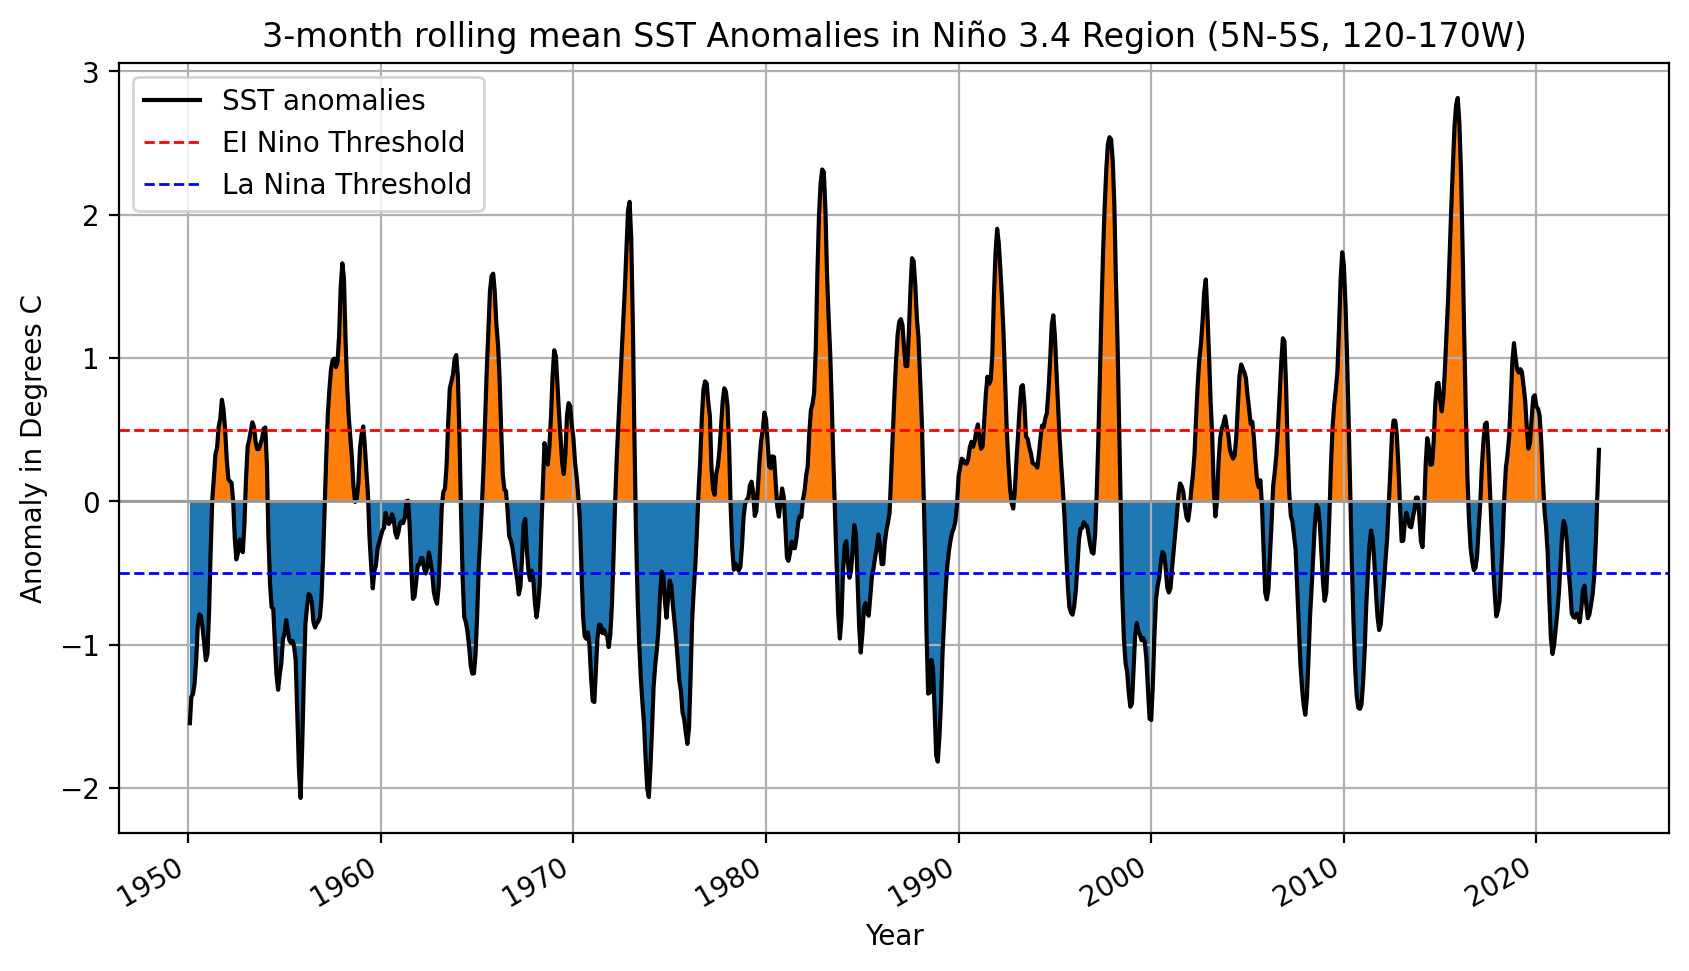

In [189]:
oni.plot(c = 'black',label='SST anomalies')
oni_positive = oni.where(oni>0)
oni_negative = oni.where(oni<0)
plt.fill_between(oni.time,oni_negative.values) # color= "b",
plt.fill_between(oni.time,oni_positive.values)

plt.axhline(0,   color='0.6',linestyle='-', linewidth=1)
plt.axhline(0.5, color='r',  linestyle='--',linewidth=1, label='EI Nino Threshold')
plt.axhline(-0.5,color='b',  linestyle='--',linewidth=1, label='La Nina Threshold')

plt.legend()
plt.grid()
plt.ylabel('Anomaly in Degrees C');
plt.xlabel('Year');
plt.title('3-month rolling mean SST Anomalies in Niño 3.4 Region (5N-5S, 120-170W)');

### 2. Calculate boolean timeseries representing the positive / negative ENSO phases

Refer to the definitions of warm/cold phases above.

Warm or cold phases of the Oceanic Niño Index are defined by a **five** consecutive **3-month** running mean of sea surface temperature (SST) anomalies in the Niño 3.4 region that is above the threshold of +0.5°C (warm), or below the threshold of -0.5°C (cold). This is known as the Oceanic Niño Index (ONI).

In [190]:
positive_phase = ((oni>0.5).astype(int).rolling(time=5, center=True).sum()==5).astype(int)
negative_phase = ((oni<-0.5).astype(int).rolling(time=5, center=True).sum()==5).astype(int)
oni_positive = oni.where(positive_phase == 1)
oni_negative = oni.where(negative_phase == 1)

positive_phase

<xarray.DataArray 'sst' (time: 881)>
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
...
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])
Coordinates:
  * time     (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2023-05-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 7 8 9 10 11 12 1 2 3 4 5

Plot them somehow.

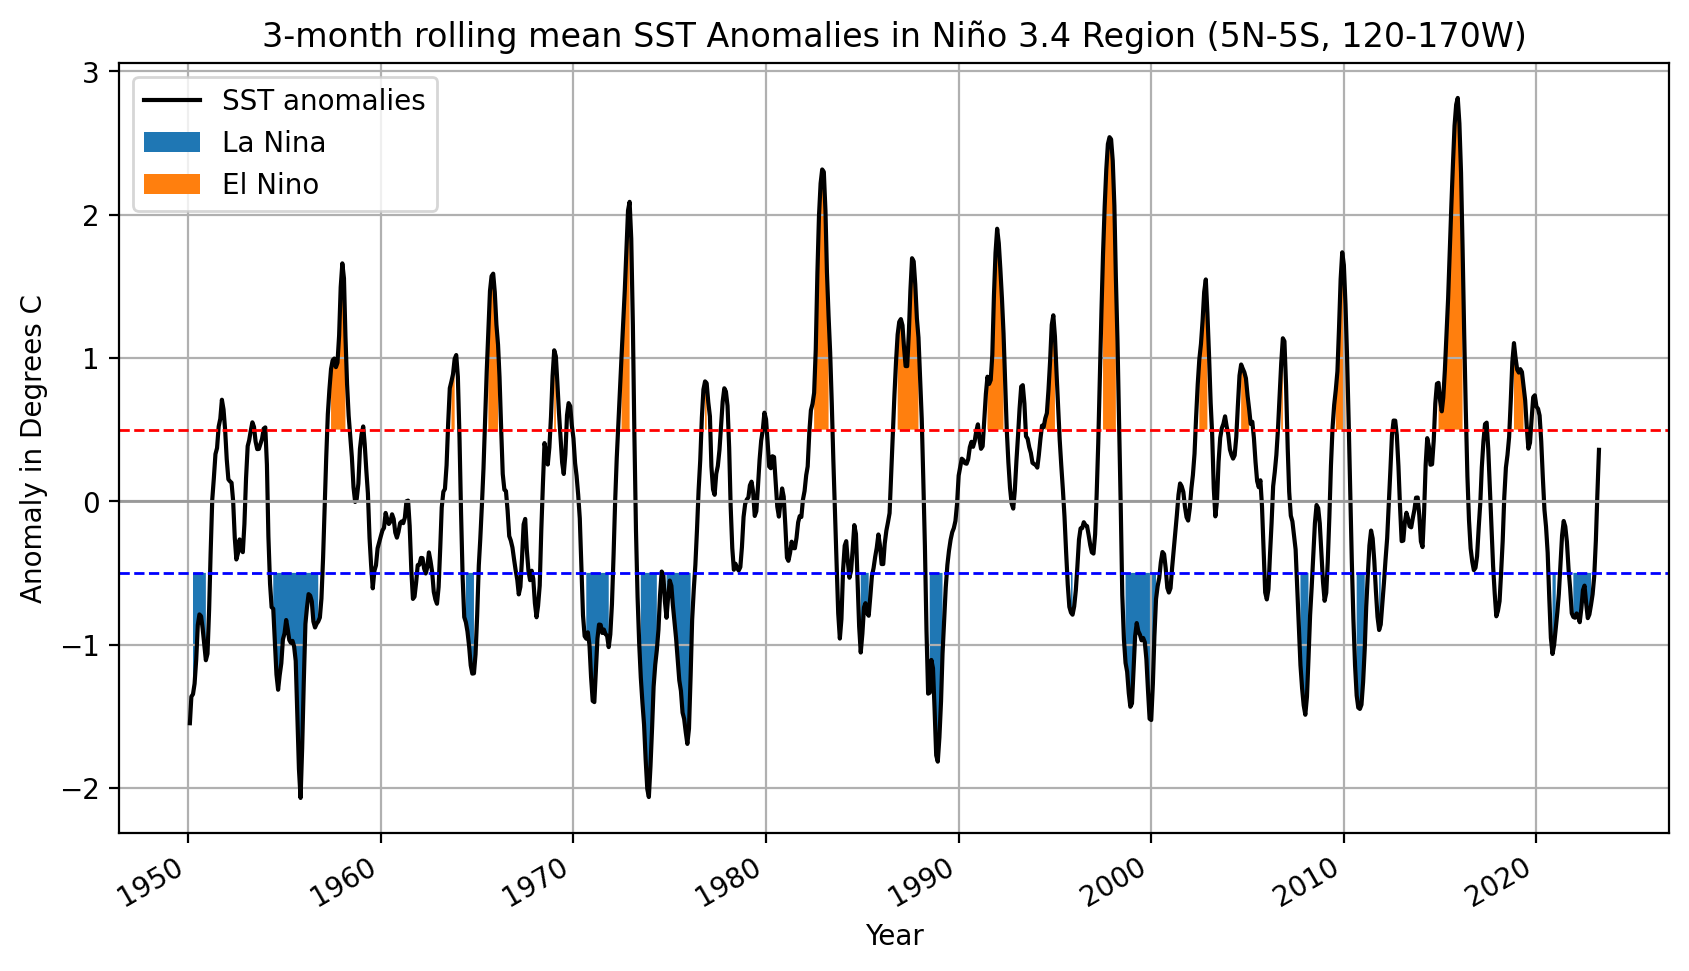

In [191]:
upper = oni_positive.values.copy()
upper[:] = 0.5

lower = oni_negative.values.copy()
lower[:] = -0.5

oni.plot(c = 'black',label='SST anomalies')
plt.fill_between(oni.time, y1 = lower, y2 = oni_negative.values, label='La Nina') # color= "b",
plt.fill_between(oni.time, y1 = upper, y2 = oni_positive.values, label='El Nino')

plt.axhline(0,   color='0.6',linestyle='-', linewidth=1)
plt.axhline(0.5, color='r',  linestyle='--',linewidth=1 ) #, label='EI Nino Threshold')
plt.axhline(-0.5,color='b',  linestyle='--',linewidth=1 ) #, label='La Nina Threshold')

plt.legend()
plt.grid()
plt.ylabel('Anomaly in Degrees C');
plt.xlabel('Year');
plt.title('3-month rolling mean SST Anomalies in Niño 3.4 Region (5N-5S, 120-170W)');

### 3. Plot composites of SST anomaly for the positive and negative ENSO regimes

These should be pcolormesh maps. First positive ONI.

Solution using `isel` and boolean indexing

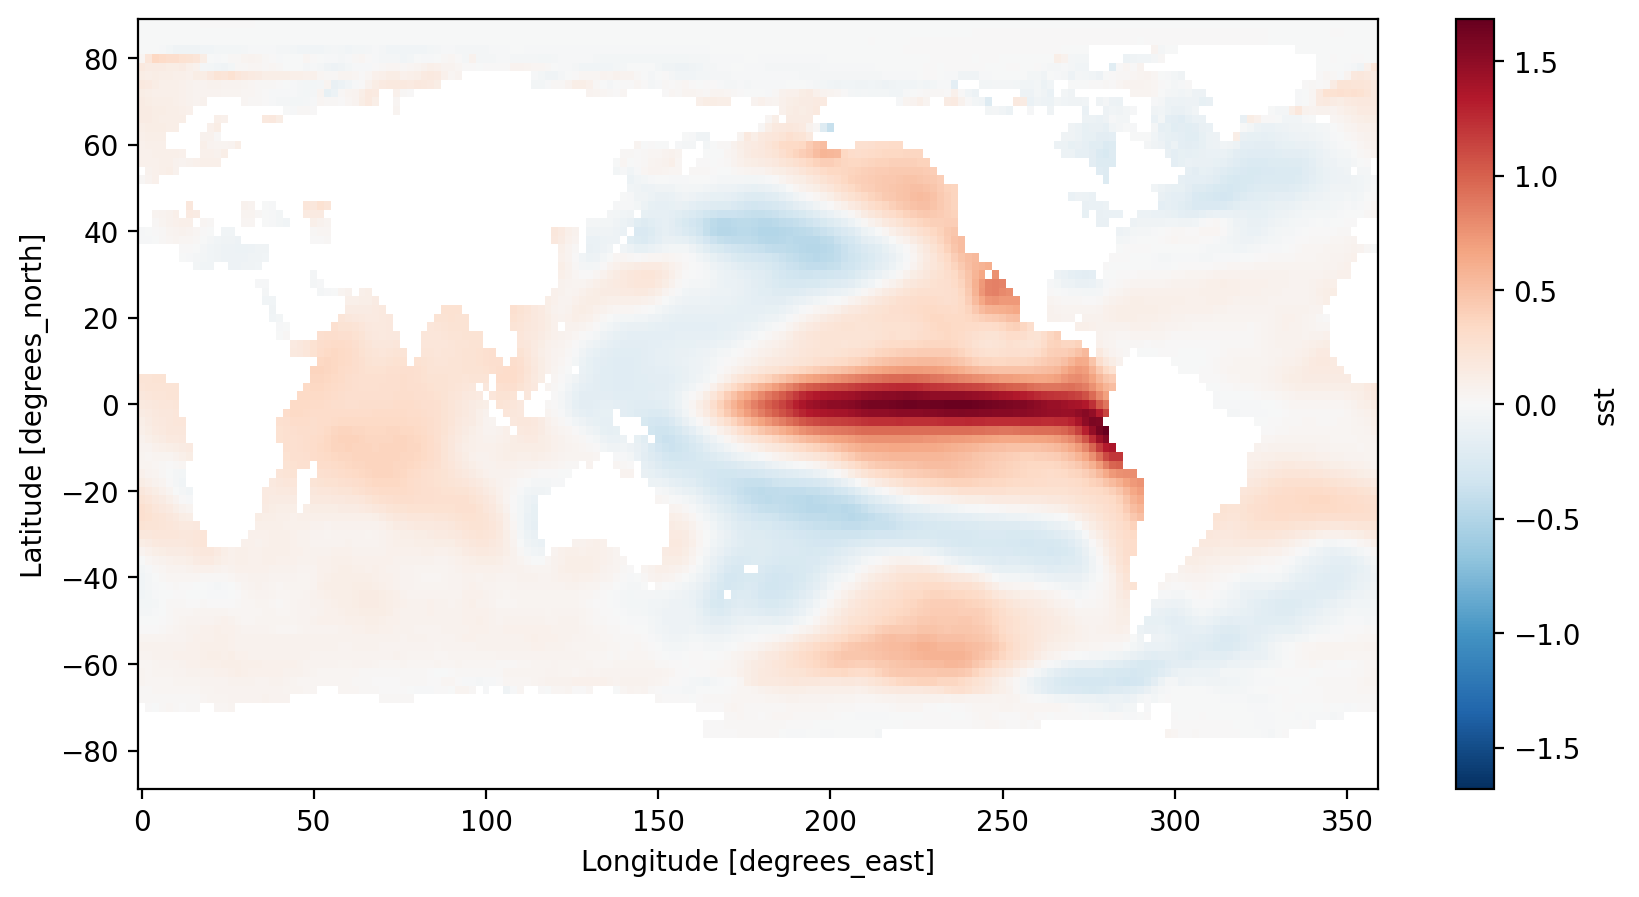

In [192]:
positive_indexer = positive_phase.fillna(0).astype('bool')
sst_anom.isel(time=positive_indexer).mean('time').plot();

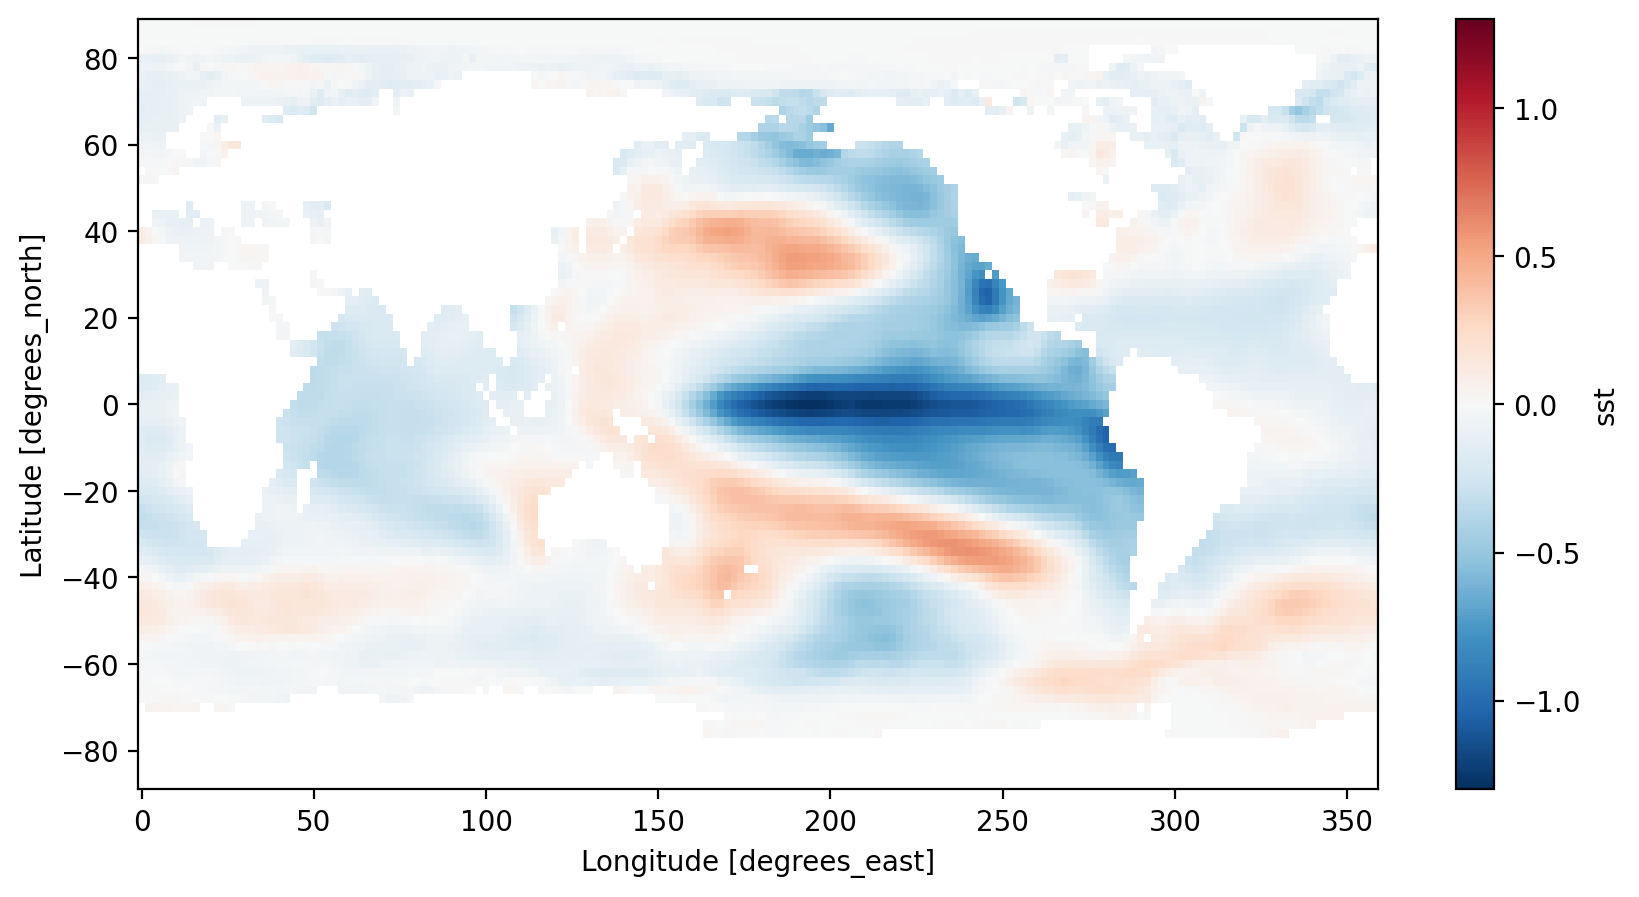

In [193]:
negative_indexer = negative_phase.fillna(0).astype('bool')
sst_anom.isel(time=negative_indexer).mean('time').plot();

Solution using `where`

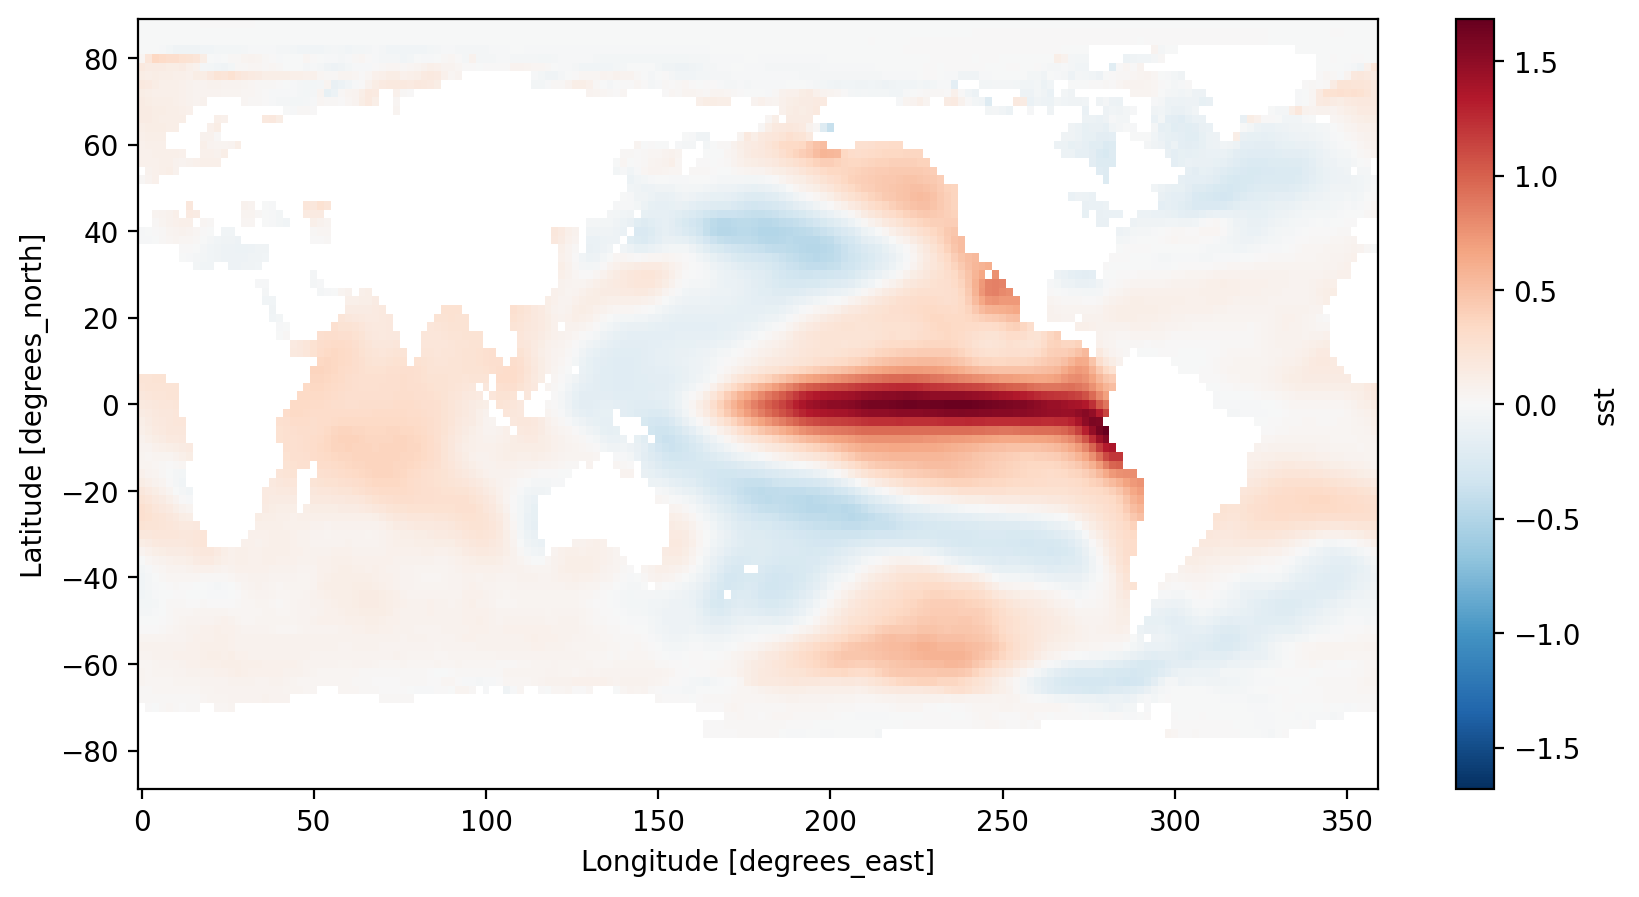

In [194]:
sst_anom.where(positive_phase).mean(dim='time').plot();

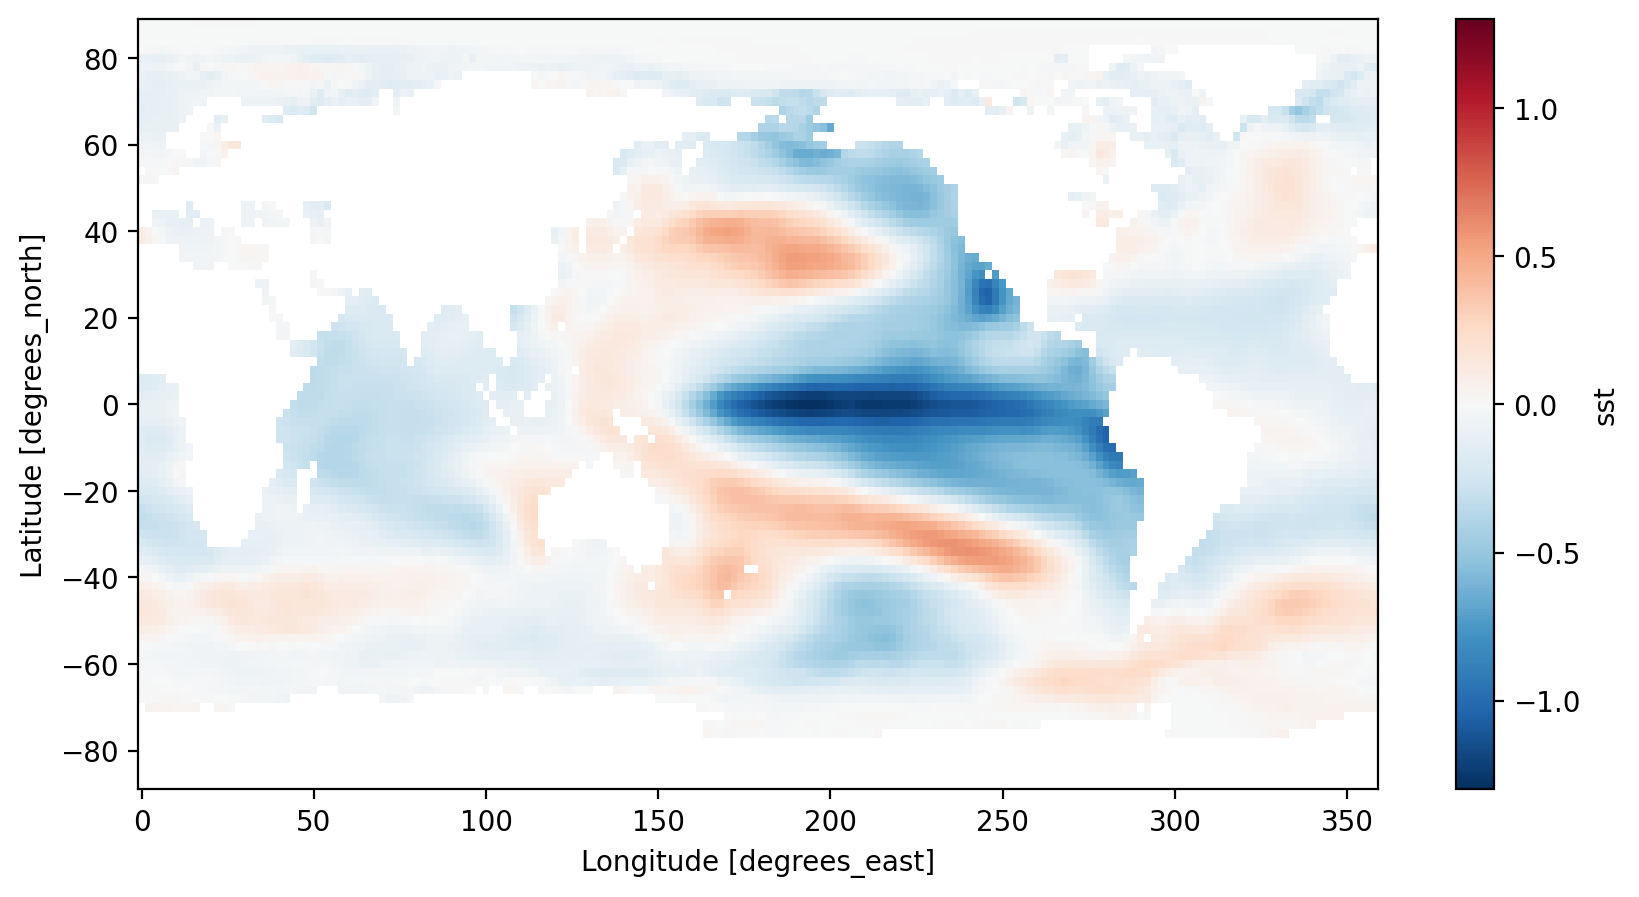

In [195]:
sst_anom.where(negative_phase).mean(dim='time').plot();

Solution using `groupby` and build composite


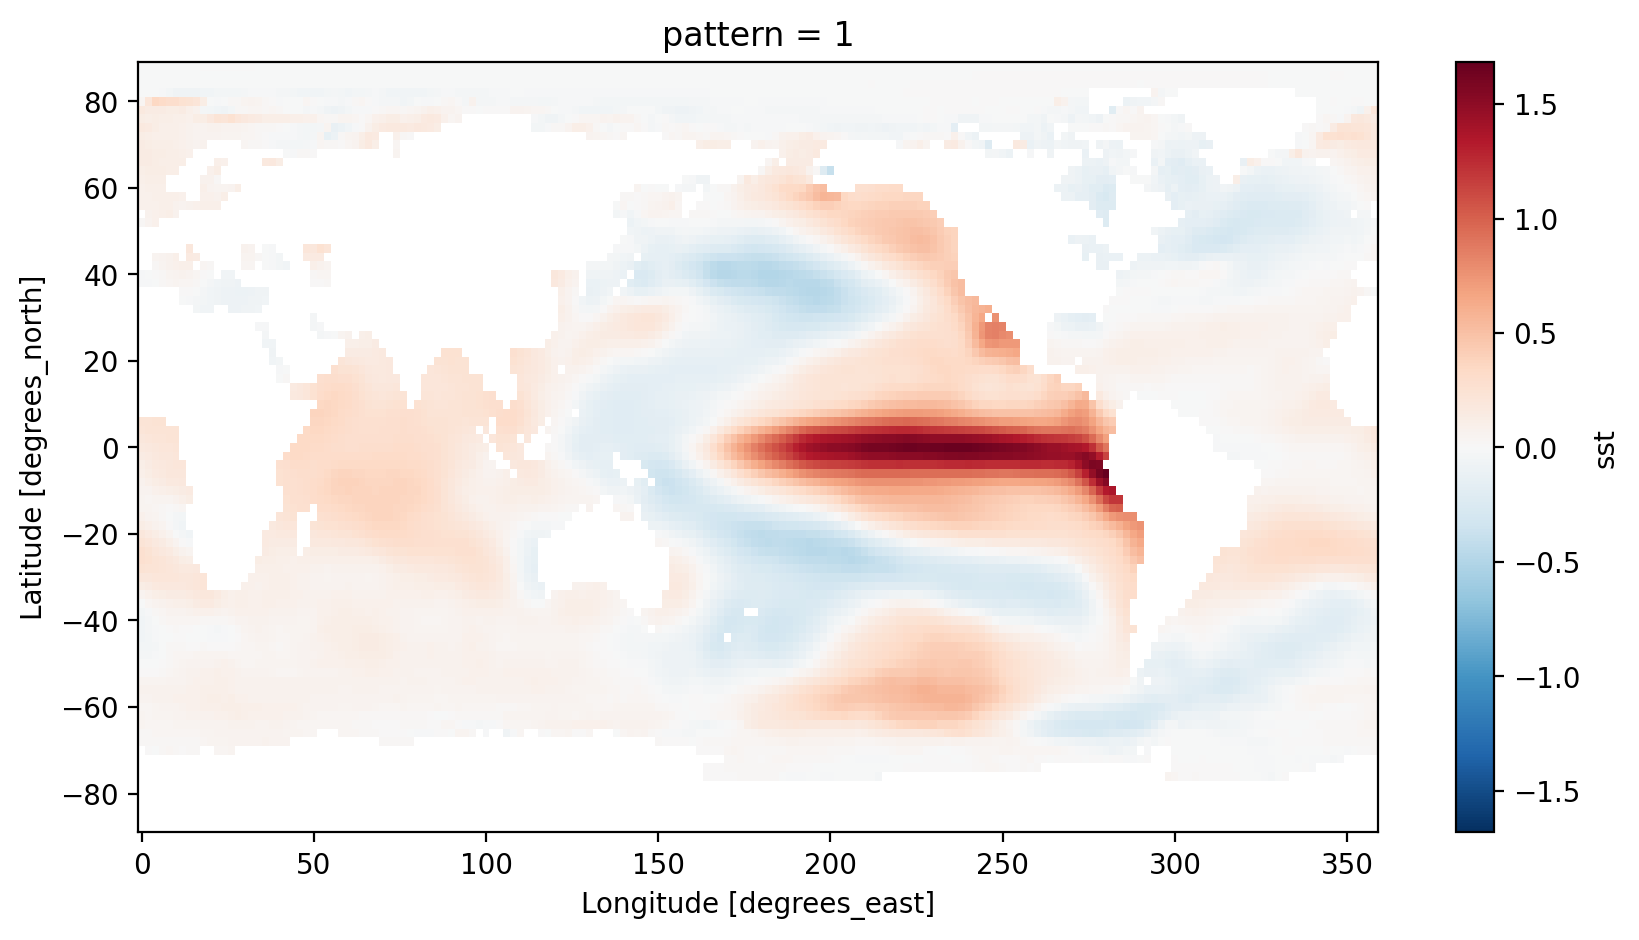

In [196]:
oni_binary = positive_phase - negative_phase
sst_composite = sst_anom.groupby(oni_binary.rename('pattern')).mean('time')
sst_composite.sel(pattern=1).plot(); #warm

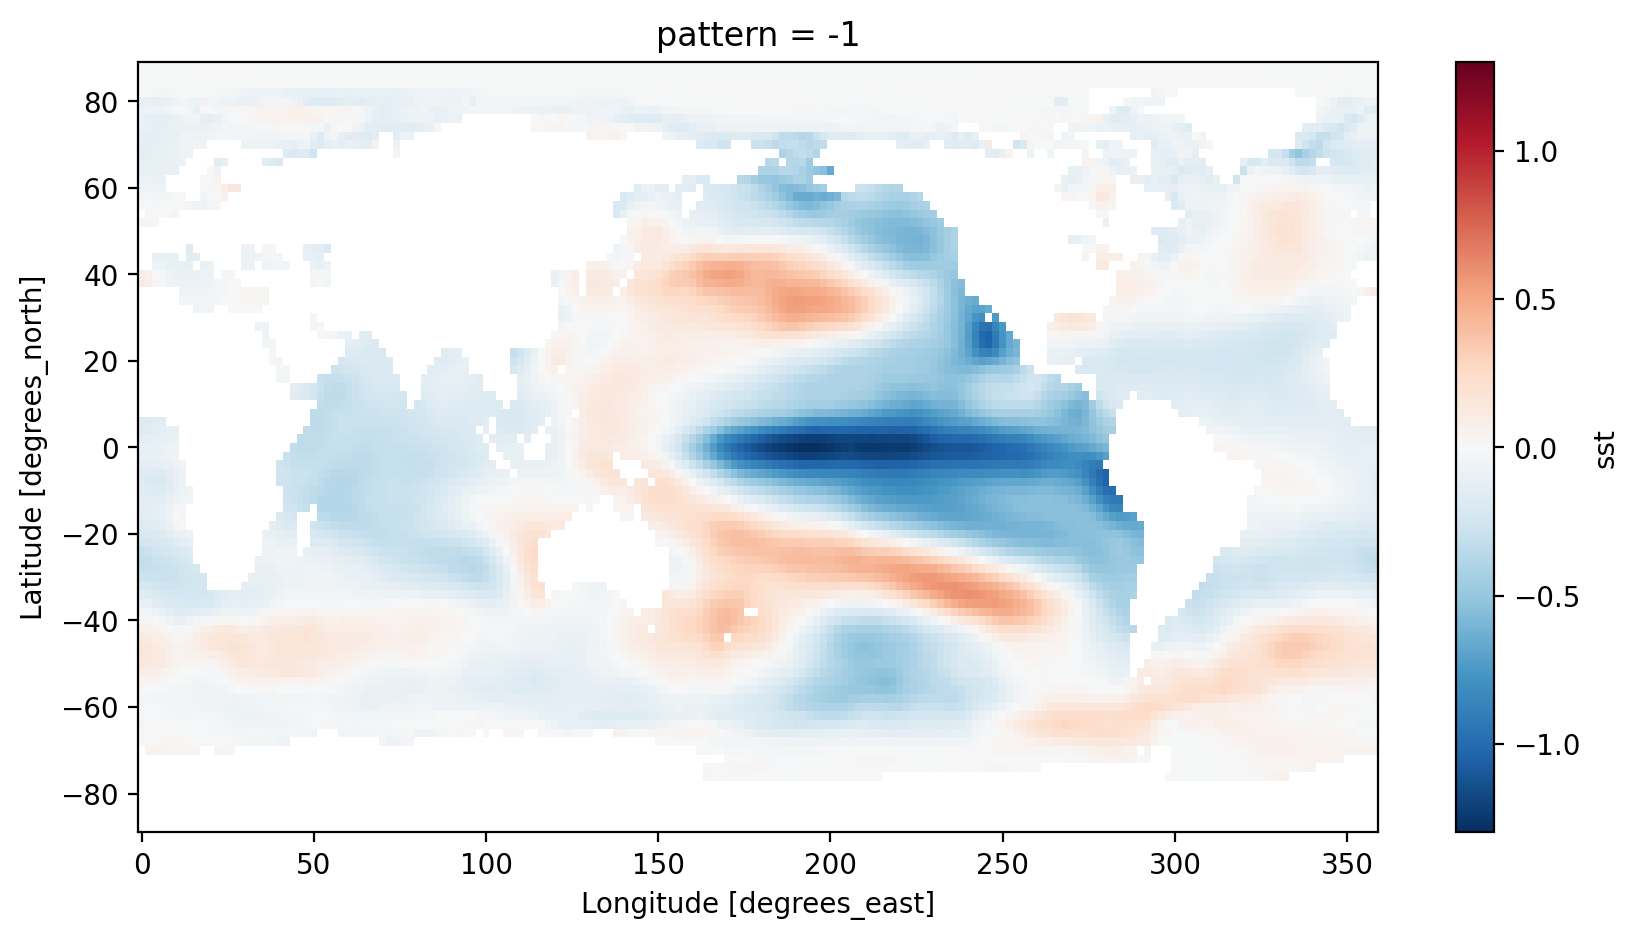

In [197]:
sst_composite.sel(pattern=-1).plot();

### 4. Calculate the composite of preciptiation for positive and negative ENSO phases.

First load the precip dataset. Code to fix the broken time coordinate is included.

In [294]:
import pandas as pd
import xarray as xr
url = 'http://iridl.ldeo.columbia.edu/SOURCES/.NASA/.GPCP/.V2p1/.multi-satellite/.prcp/dods'
dsp = xr.open_dataset(url, decode_times=False)
dsp.T.attrs['calendar'] = '360_day'
dsp = xr.decode_cf(dsp)
# convert to datetime64 type
d_index    = dsp.indexes['T'].to_datetimeindex()
dsp['T']   = ('T', d_index)
# Interpolate dsp along the 'time 'coordinates of ds_anom
# Keep 'Y', 'X' of dsp unchanged
dsp        = dsp.rename({'T': 'time'})
dsp_interp = dsp.interp_like(positive_phase.sel(time=slice('1960-01','1989-06')),method='linear')

dsp_interp

<xarray.Dataset>
Dimensions:  (T: 354, Y: 72, X: 144)
Coordinates:
  * T        (T) float32 228.5 229.5 230.5 231.5 ... 578.5 579.5 580.5 581.5
  * Y        (Y) float32 88.75 86.25 83.75 81.25 ... -81.25 -83.75 -86.25 -88.75
  * X        (X) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
Data variables:
    prcp     (T, Y, X) float32 ...
Attributes:
    Conventions:  IRIDL

Text(0.5, 1.0, 'not exactly the same')

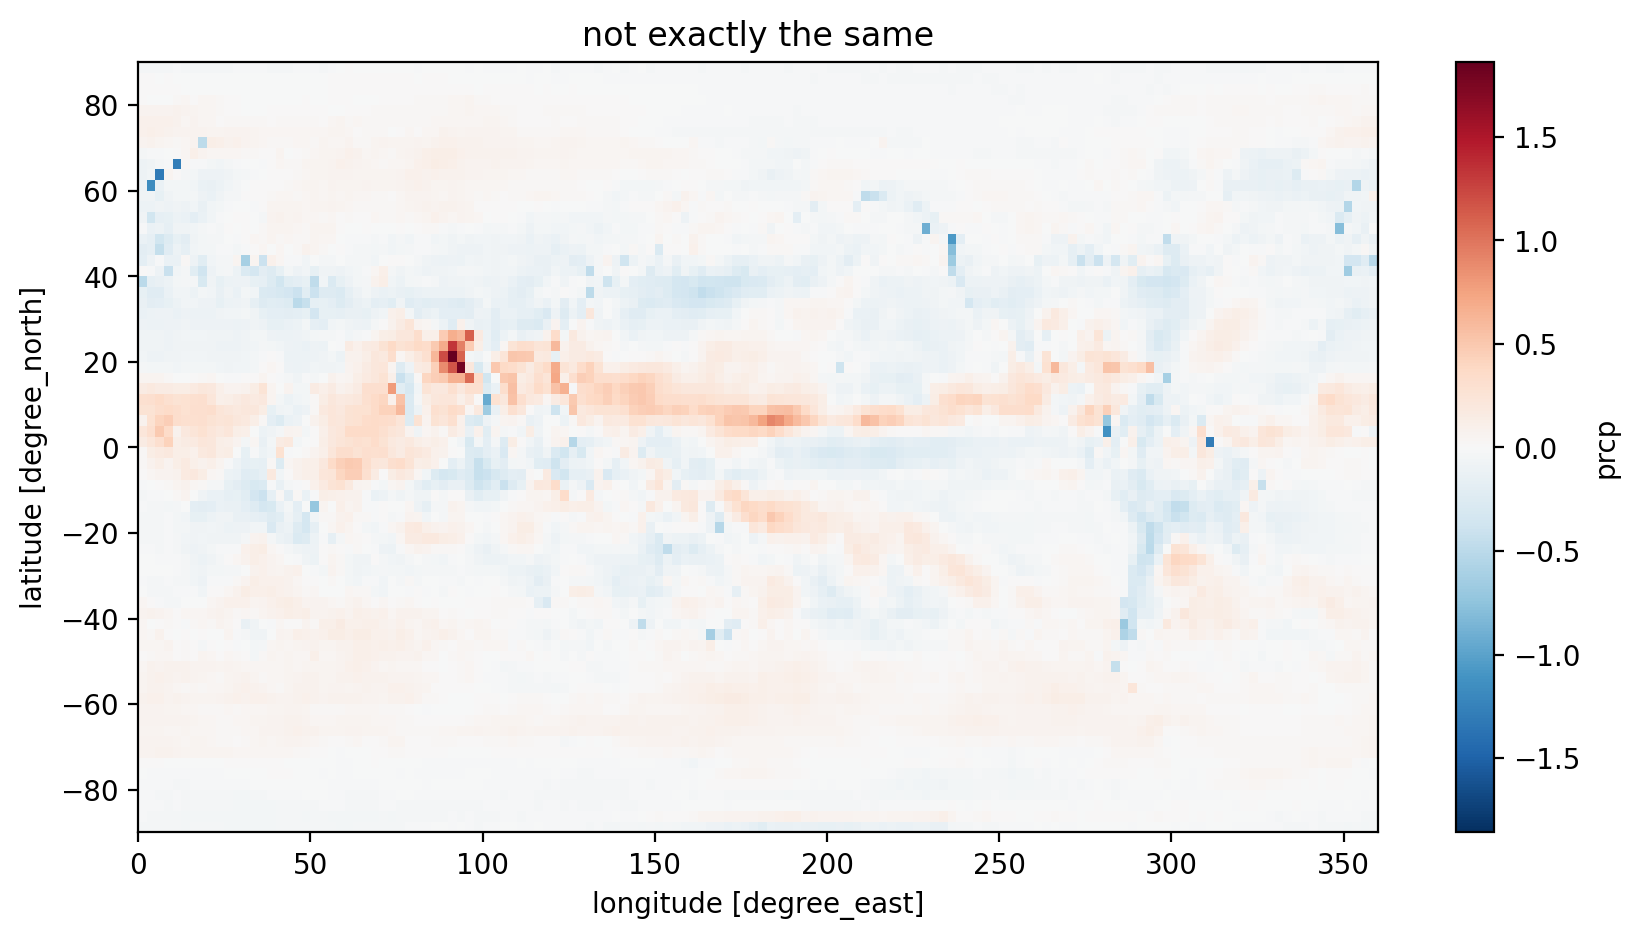

In [320]:
(dsp.mean('time') - dsp_interp.mean('time')).prcp.plot()
plt.title('not exactly the same')

In [311]:
el_nino = positive_phase.sel(time = dsp_interp.time).astype('bool')
la_nina = negative_phase.sel(time = dsp_interp.time).astype('bool')

Now plot the *difference* between the time-mean of `prcp` during positive and negative ENSO phases.

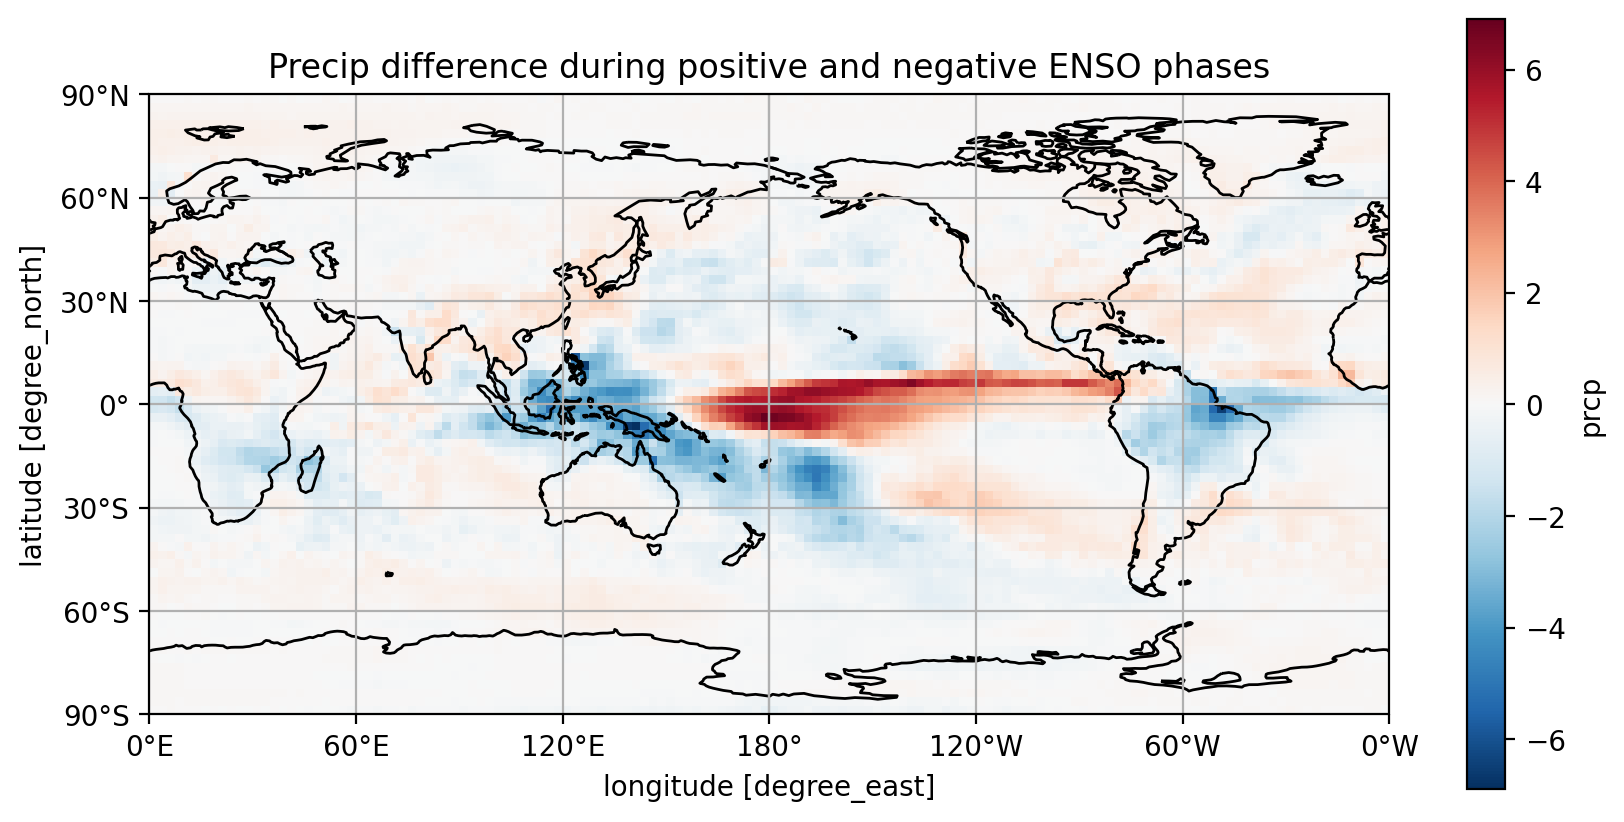

In [319]:
import cartopy.crs as ccrs
import cartopy

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
## subplot_kw: Dict of keywords to be passed to the add_subplot call to add keywords to each subplot. 
(dsp_interp.prcp.where(el_nino).mean('time') - dsp_interp.prcp.where(la_nina).mean('time')).plot(ax=ax,transform=ccrs.PlateCarree(),);
ax.set_title('Precip difference during positive and negative ENSO phases')
ax.coastlines()
ax.gridlines()
ax.set_xticks([-180,-120, -60, 0, 60, 120, 180]) #, crs=ccrs.PlateCarree())
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90]) #, crs=ccrs.PlateCarree())

from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter,
                                LatitudeLocator, LongitudeLocator)

lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)


# https://www.researchgate.net/figure/Difference-between-rainfall-during-El-Nino-and-La-Nina-conditions-in-Northern-Hemisphere_fig1_350894485

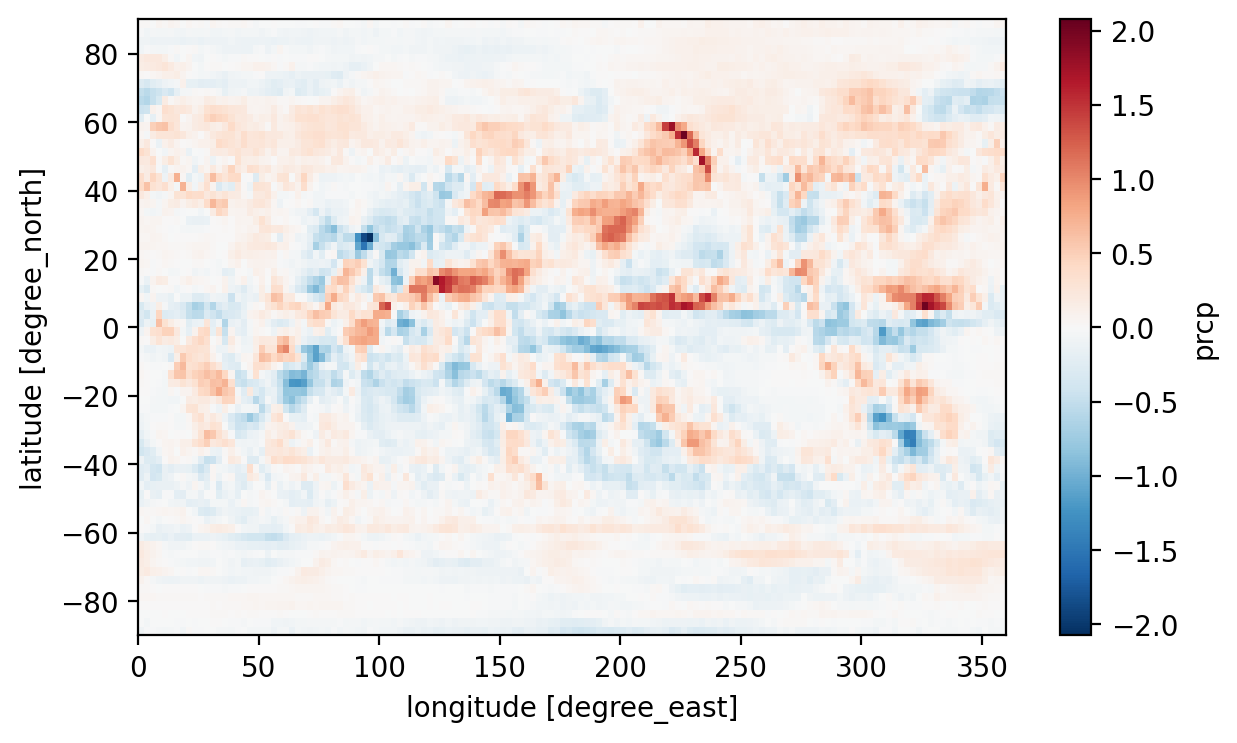

In [295]:
import pandas as pd
import xarray as xr
url = 'http://iridl.ldeo.columbia.edu/SOURCES/.NASA/.GPCP/.V2p1/.multi-satellite/.prcp/dods'
dsp = xr.open_dataset(url, decode_times=False)
true_time = (pd.date_range(start='1960-01-01', periods=len(dsp['T']), freq='MS'))
dsp['T'] = true_time
dsp = dsp.rename({'T': 'time'})
dsp.load()

el_nino = positive_phase.sel(time = dsp.time).astype('bool')
la_nina = negative_phase.sel(time = dsp.time).astype('bool')
(dsp.prcp.where(el_nino).mean('time') - dsp.prcp.where(la_nina).mean('time')).plot(figsize=(7,4));
